Bu veri seti, Türkiye'deki satılık konut ilanlarına ait detaylı bilgileri içermektedir. Amacı, ev fiyatlarını tahmin etmeye yönelik regresyon modelleri başta olmak üzere, veri analizi, özellik mühendisliği ve makine öğrenmesi uygulamaları için zengin ve anlamlı bir kaynak sunmaktır.

Veri seti, hem sayısal hem de kategorik birçok özelliği barındırmakta olup, konutların fiziksel özellikleri, hukuki durumları ve ilan bilgileri hakkında kapsamlı bilgiler sunmaktadır.

🏡 Özellik Açıklamaları:
İlçe (District): Evin bulunduğu ilçe veya semt.

Fiyat (Price): Evin satış fiyatı (Türk Lirası ₺ cinsinden). Bu proje kapsamında hedef değişken olarak kullanılmıştır.

Adres (Address): Konutun açık adresi (tanımsal amaçlı).

İlan Güncelleme / Oluşturma Tarihi (AdUpdateDate / AdCreationDate): İlanın son güncelleme ve ilk yayınlanma tarihleri.

Kategori (Category): İlan türü — bu veri setinde sadece “Satılık”.

Brüt / Net Metrekare (Gross / Net Square Meters): Evin toplam ve kullanılabilir alanı (m²).

Bina Yaşı (BuildingAge): Binanın yaşı (yıl cinsinden).

Binadaki Kat Sayısı / Daire Katı (NumberFloorsofBuilding / FloorLocation): Binanın toplam kat sayısı ve dairenin konumu.

Oda Sayısı / Toplam Oda (NumberOfRooms / TotalRooms): Oda sayısı, örneğin "3+1" gibi formatlar da çözümlenmiştir.

Isıtma Türü (HeatingType): Kombi, merkezi sistem, doğalgaz vb.

Krediye Uygunluk (CreditEligibility): Evin konut kredisine uygunluğu.

Site İçinde (InsideTheSite): Konutun bir site içerisinde olup olmadığı.

Yatırıma Uygunluk (EligibilityForInvestment): Yatırımlık olup olmadığı.

Eşya Durumu (ItemStatus): Evin eşyalı mı boş mu olduğu.

Kullanım Durumu (UsingStatus): Evin şu anda kim tarafından kullanıldığı (mülk sahibi, kiracı, boş).

Bina Durumu / Tapu Durumu / Yapı Türü / İpotek Durumu / Takas (BuildStatus / TitleStatus / StructureType / MortgageStatus / Swap): Yapı ile ilgili hukuki ve fiziksel durum bilgileri.

Banyo ve WC Bilgileri: Sayı ve alan (m²) bilgileri.

Balkon Bilgileri: Balkon sayısı, tipi (teras, açık vb.) ve alan bilgileri.

Kira Getirisi (RentalIncome): Eğer mevcutsa, evin aylık kiraya verilmesi durumunda elde edilecek gelir.

Salon, WC, Banyo, Balkon m²: Her bölüm için metrekare bilgileri.

Video ile Gezilebilir mi? (IsItVideoNavigable?): İlanda video ile sanal tur imkanı var mı?

Aidat (Subscription): Konutun bulunduğu yapıya ait aylık aidat ücreti.

In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/HouseData.csv')

# İlk 5 satırı görüntüle
print(df.head())


   Unnamed: 0 district         price  \
0           0   adalar   3,100,000TL   
1           1   adalar   1,600,000TL   
2           2   adalar  18,500,000TL   
3           3   adalar   9,500,000TL   
4           4   adalar  25,000,000TL   

                                             address   AdUpdateDate Category  \
0  ['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...  24 Şubat 2022  Satılık   
1  ['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...   02 Mart 2022  Satılık   
2  ['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...  11 Şubat 2022  Satılık   
3  ['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...  11 Şubat 2022  Satılık   
4  ['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...   19 Ocak 2022  Satılık   

  GrossSquareMeters  BuildingAge  NumberFloorsofBuilding  \
0            160 m2  21 Ve Üzeri                       3   
1            120 m2         5-10                       3   
2            350 m2  21 Ve Üzeri                       2   
3            550 m2        11-15      

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

In [ ]:
print(df.isna().sum())

Unnamed: 0                      0
district                        0
price                           0
address                         0
AdUpdateDate                    0
Category                        0
GrossSquareMeters               0
BuildingAge                     0
NumberFloorsofBuilding          0
UsingStatus                     0
EligibilityForInvestment     3649
BuildStatus                 13924
TitleStatus                 15443
ItemStatus                   6823
NumberOfBathrooms               0
NumberOfWCs                 17026
AdCreationDate                  0
Type                            0
NetSquareMeters                 0
NumberOfRooms                   0
FloorLocation                   0
HeatingType                     0
CreditEligibility               0
InsideTheSite                   0
StructureType               14749
MortgageStatus              19097
Swap                         4316
Balcony                     16046
PriceStatus                     0
RentalIncome  

25155 satırdan 13bin ve üstü eksik veri olanları sildim,eksik oranları %50den fazla

In [ ]:
drop_cols = [
    'BuildStatus',
    'TitleStatus',
    'NumberOfWCs',
    'StructureType',
    'MortgageStatus',
    'Balcony',
    'RentalIncome',
    'NumberOfBalconies',
    'BalconyType',
    'HallSquareMeters',
    'WCSquareMeters',
    'IsItVideoNavigable?',
    'Subscription',
    'BathroomSquareMeters',
    'BalconySquareMeters'
]
df.drop(columns=drop_cols, inplace=True)


Diğer 3 sütun da categorical olduğu için eksikleri mod ile dolduruyoruz

In [ ]:
# Kategorik sütunların mod ile doldurulması
categorical_cols = ['Swap', 'EligibilityForInvestment', 'ItemStatus']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


<ipython-input-213-4d6e7b6d8e67>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [ ]:
print(df.isna().sum())

Unnamed: 0                  0
district                    0
price                       0
address                     0
AdUpdateDate                0
Category                    0
GrossSquareMeters           0
BuildingAge                 0
NumberFloorsofBuilding      0
UsingStatus                 0
EligibilityForInvestment    0
ItemStatus                  0
NumberOfBathrooms           0
AdCreationDate              0
Type                        0
NetSquareMeters             0
NumberOfRooms               0
FloorLocation               0
HeatingType                 0
CreditEligibility           0
InsideTheSite               0
Swap                        0
PriceStatus                 0
dtype: int64


In [ ]:
print(df.isnull().sum())

Unnamed: 0                  0
district                    0
price                       0
address                     0
AdUpdateDate                0
Category                    0
GrossSquareMeters           0
BuildingAge                 0
NumberFloorsofBuilding      0
UsingStatus                 0
EligibilityForInvestment    0
ItemStatus                  0
NumberOfBathrooms           0
AdCreationDate              0
Type                        0
NetSquareMeters             0
NumberOfRooms               0
FloorLocation               0
HeatingType                 0
CreditEligibility           0
InsideTheSite               0
Swap                        0
PriceStatus                 0
dtype: int64


Değerleri uygun forma dönüşütüyoruz ve gereksiz sütunları siliyoruz





In [ ]:
df['price'] = (
    df['price']
    .str.replace('[^0-9]', '', regex=True)
    .astype(float)
)
df['GrossSquareMeters'] = (
    df['GrossSquareMeters']
    .str.replace('[^0-9]', '', regex=True)
    .astype(float)
)

df['NetSquareMeters'] = (
    df['NetSquareMeters']
    .str.replace('[^0-9]', '', regex=True)
    .astype(float)
)
import numpy as np

def parse_rooms(x):
    x = str(x).lower().replace('oda', '').replace(' ', '').replace('+', '+')
    if '8+' in x:
        return 8  # max olarak kabul et
    try:
        parts = x.split('+')
        return sum(int(p) for p in parts if p.isdigit())
    except:
        return np.nan

df['TotalRooms'] = df['NumberOfRooms'].apply(parse_rooms)
def age_to_num(x):
    if '21' in x:
        return 21
    elif '-' in x:
        try:
            return int(x.split('-')[1])
        except:
            return np.nan
    else:
        try:
            return int(x)
        except:
            return np.nan

df['BuildingAge'] = df['BuildingAge'].apply(age_to_num)
df.drop(columns=['address'], inplace=True)

df.drop(columns=['AdUpdateDate', 'AdCreationDate','Unnamed: 0', 'Category','NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment','NumberOfBathrooms', 'Type', 'HeatingType', 'CreditEligibility',
       'Swap',  'PriceStatus'], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           25155 non-null  object 
 1   price              25155 non-null  float64
 2   GrossSquareMeters  25155 non-null  float64
 3   BuildingAge        17821 non-null  float64
 4   ItemStatus         25155 non-null  object 
 5   NetSquareMeters    25155 non-null  float64
 6   NumberOfRooms      25155 non-null  object 
 7   FloorLocation      25155 non-null  object 
 8   InsideTheSite      25155 non-null  object 
 9   TotalRooms         25155 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


BuildingAge değişkeni numericala dönüştürüldükten sonra eksik değere sahip olduğu görüldü. Median ile dolduruldu.

In [ ]:
df['BuildingAge'].fillna(df['BuildingAge'].median(), inplace=True)


<ipython-input-218-ab12aa865c16>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BuildingAge'].fillna(df['BuildingAge'].median(), inplace=True)


In [ ]:
df.describe()

,price,GrossSquareMeters,BuildingAge,NetSquareMeters,TotalRooms
count,2.515500e+04,25155.000000,25155.000000,25155.000000,25155.000000
mean,1.287062e+07,1751.597297,11.299304,1449.045518,3.820433
std,2.916856e+08,5476.426325,6.009433,4446.371246,1.493564
min,2.000000e+04,322.000000,1.000000,12.000000,0.000000
25%,8.000000e+05,952.000000,10.000000,837.000000,3.000000
50%,1.450000e+06,1242.000000,10.000000,1052.000000,4.000000
75%,3.500000e+06,1702.000000,15.000000,1482.000000,4.000000
max,3.850000e+10,523002.000000,21.000000,520002.000000,10.000000


Price değişkeninde min max değerleri arasında çok büyük fark var ve standart sapma ortalamaya göre çok yüksek. Aykırı değerler var

GrossSquareMeters max değeri ve standart sapması yüksek aykırı değerler var

NetSquareMeters max değeri çok uçuk değerde

TotalRooms 0 olamaz bu da eksik değer olduğunu gösteriyor, TotalRoomsda 0 olan değerleri medyan ile dolduruyoruz

In [ ]:
median_rooms = df.loc[df['TotalRooms'] > 0, 'TotalRooms'].median()
df.loc[df['TotalRooms'] == 0, 'TotalRooms'] = median_rooms


Feauture Engineeringle yeni veriler ekliyoruz.

In [ ]:
# 1. Verimlilik (Net/Gross m²)
df['Efficiency'] = df['NetSquareMeters'] / df['GrossSquareMeters']

# 2. Birim fiyat
df['PricePerSquareMeter'] = df['price'] / df['NetSquareMeters']

# 3. Bina yaş kategorisi
df['BuildingAgeGroup'] = pd.cut(
    df['BuildingAge'],
    bins=[0, 5, 10, 20, df['BuildingAge'].max()],
    labels=['0-5', '6-10', '11-20', '21+']
)

# 4. Kat türünü sadeleştirme
def simplify_floor(floor):
    floor = str(floor).lower()
    if 'bahçe' in floor or 'zemin' in floor:
        return 'Zemin'
    elif 'giriş' in floor:
        return 'Giriş'
    elif 'çatı' in floor:
        return 'Çatı'
    elif 'yüksek' in floor:
        return 'Yüksek'
    elif 'ara' in floor:
        return 'Ara Kat'
    else:
        return 'Diğer'

df['FloorCategory'] = df['FloorLocation'].apply(simplify_floor)

# 5. Oda + Salon sayısını ayırma
df[['Rooms', 'Halls']] = df['NumberOfRooms'].str.extract(r'(\d+)\+?(\d*)')
df['Rooms'] = df['Rooms'].astype(float)
df['Halls'] = df['Halls'].replace('', 0).astype(float)

# 6. Site içinde mi (binary)
df['InsideSiteBinary'] = df['InsideTheSite'].map({'Evet': 1, 'Hayır': 0})


Yeni veriler oluşturduktan sonra tekrar etmemesi adına bazılarını silebiliriz

In [ ]:
columns_to_drop = [
    'GrossSquareMeters',       # yerine 'Efficiency'
    'NetSquareMeters',         # yerine 'Efficiency', 'PricePerSquareMeter'
    'FloorLocation',           # yerine 'FloorCategory'
    'NumberOfRooms',           # yerine 'Rooms', 'Halls'
    'InsideTheSite',           # yerine 'InsideSiteBinary'
    'BuildingAge'              #yerine BuildingAgeGroup
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
df.head()

,district,price,ItemStatus,TotalRooms,Efficiency,PricePerSquareMeter,BuildingAgeGroup,FloorCategory,Rooms,Halls,InsideSiteBinary
0,adalar,3100000.0,Eşyalı,4,0.750312,2579.034942,21+,Çatı,3.0,1.0,0
1,adalar,1600000.0,Eşyalı,3,0.833611,1596.806387,6-10,Zemin,2.0,1.0,0
2,adalar,18500000.0,Boş,4,0.857224,6162.558294,21+,Giriş,3.0,1.0,0
3,adalar,9500000.0,Boş,8,0.981825,1758.607923,11-20,Giriş,8.0,0.0,0
4,adalar,25000000.0,Boş,8,0.833373,3570.408455,21+,Giriş,8.0,0.0,0


Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['BuildingAgeGroup'] = le.fit_transform(df['BuildingAgeGroup'].astype(str))

# ItemStatus için önce sütundaki benzersiz değerleri görelim
print(df['ItemStatus'].unique())

# 'Eşyalı' ise 1, diğer durumlar (örneğin 'Boş' veya farklısa) 0
df['ItemStatus_encoded'] = df['ItemStatus'].apply(lambda x: 1 if 'Eşyalı' in str(x) else 0)

df.drop('ItemStatus', axis=1, inplace=True)

print(df['FloorCategory'].unique())

le_floor = LabelEncoder()
df['FloorCategory_encoded'] = le_floor.fit_transform(df['FloorCategory'].astype(str))

df.drop('FloorCategory', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['district'], drop_first=True)



['Eşyalı' 'Boş']
['Çatı' 'Zemin' 'Giriş' 'Diğer' 'Yüksek']


In [ ]:
df.head()

,price,TotalRooms,Efficiency,PricePerSquareMeter,BuildingAgeGroup,Rooms,Halls,InsideSiteBinary,ItemStatus_encoded,FloorCategory_encoded,...,district_sariyer,district_sile,district_silivri,district_sisli,district_sultanbeyli,district_sultangazi,district_tuzla,district_umraniye,district_uskudar,district_zeytinburnu
0,3100000.0,4,0.750312,2579.034942,2,3.0,1.0,0,1,4,...,False,False,False,False,False,False,False,False,False,False
1,1600000.0,3,0.833611,1596.806387,3,2.0,1.0,0,1,3,...,False,False,False,False,False,False,False,False,False,False
2,18500000.0,4,0.857224,6162.558294,2,3.0,1.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,9500000.0,8,0.981825,1758.607923,1,8.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,25000000.0,8,0.833373,3570.408455,2,8.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.to_csv('processed_data.csv', index=False, encoding='utf-8-sig')


Aykırı değerleri kontrol edip sınıra çekiyoruz


--- price Sütunu ---


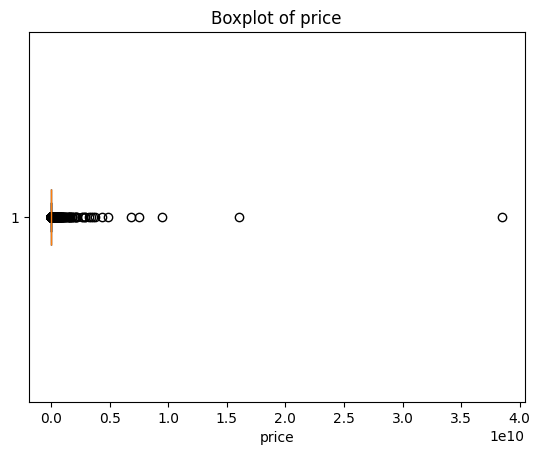

IQR: 2700000.0, Lower Bound: -3250000.0, Upper Bound: 7550000.0
Aykırı Değer Sayısı: 3032


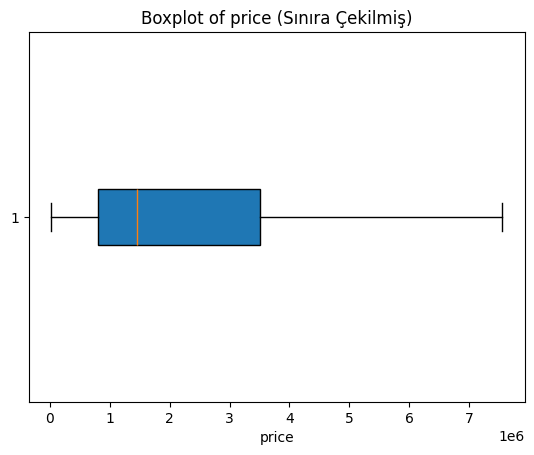


--- TotalRooms Sütunu ---


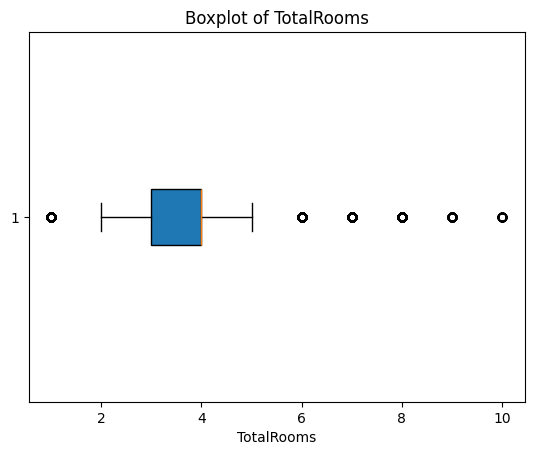

IQR: 1.0, Lower Bound: 1.5, Upper Bound: 5.5
Aykırı Değer Sayısı: 3709


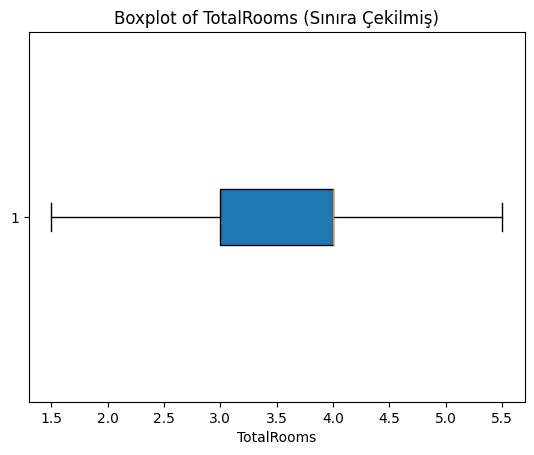


--- Efficiency Sütunu ---


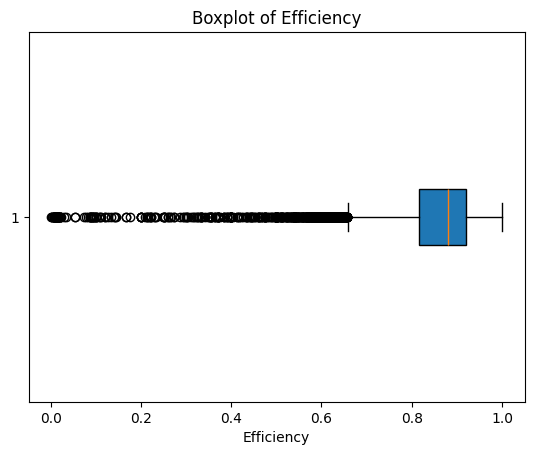

IQR: 0.1050390381307067, Lower Bound: 0.6575302002003897, Upper Bound: 1.0776863527232163
Aykırı Değer Sayısı: 800


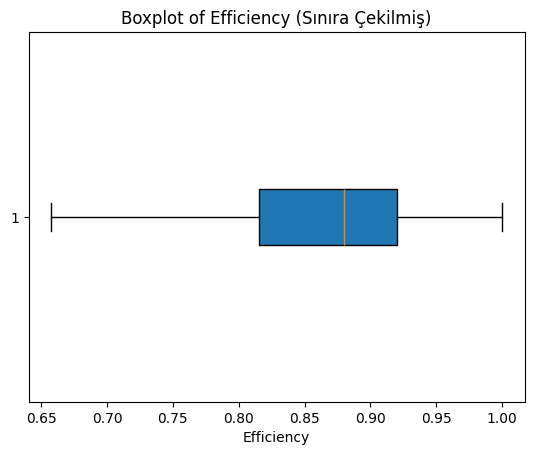


--- PricePerSquareMeter Sütunu ---


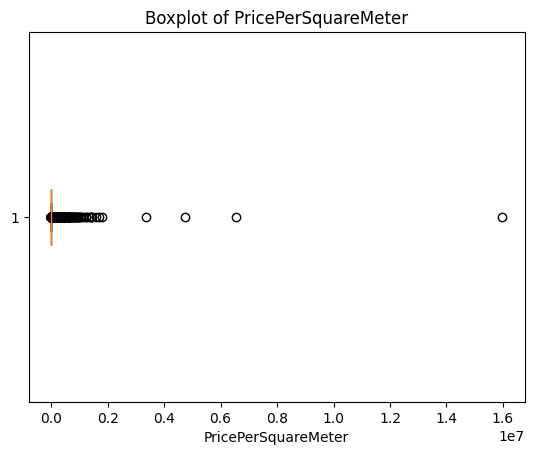

IQR: 2126.6497959322787, Lower Bound: -2382.3521893612133, Upper Bound: 6124.246994367902
Aykırı Değer Sayısı: 2500


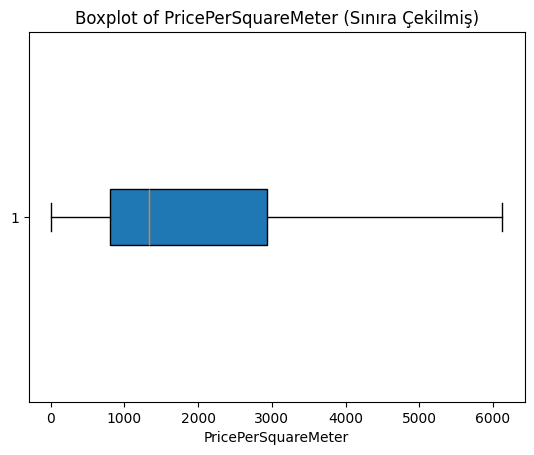


--- BuildingAgeGroup Sütunu ---


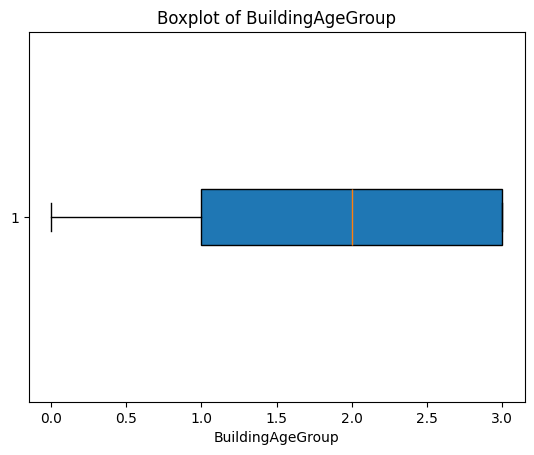

IQR: 2.0, Lower Bound: -2.0, Upper Bound: 6.0
Aykırı Değer Sayısı: 0


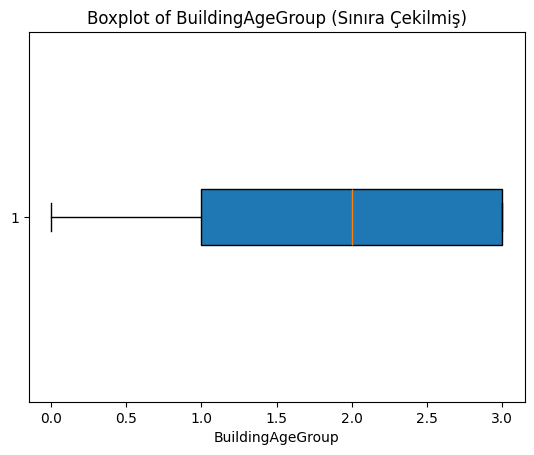


--- Rooms Sütunu ---


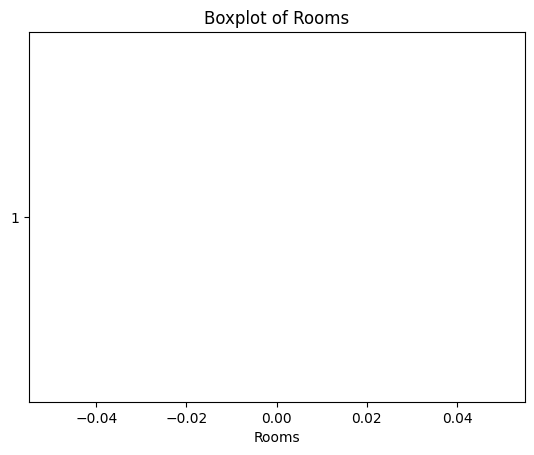

IQR: 1.0, Lower Bound: 0.5, Upper Bound: 4.5
Aykırı Değer Sayısı: 2183


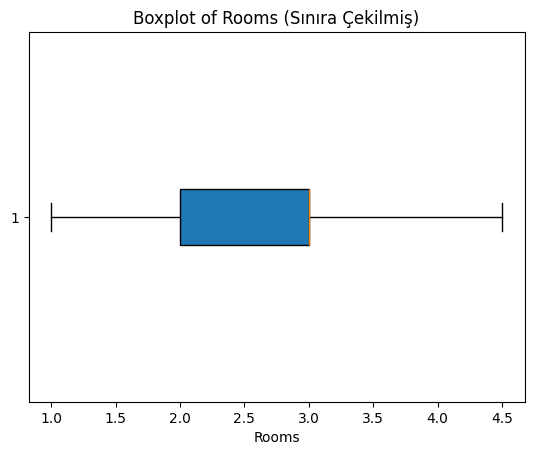


--- Halls Sütunu ---


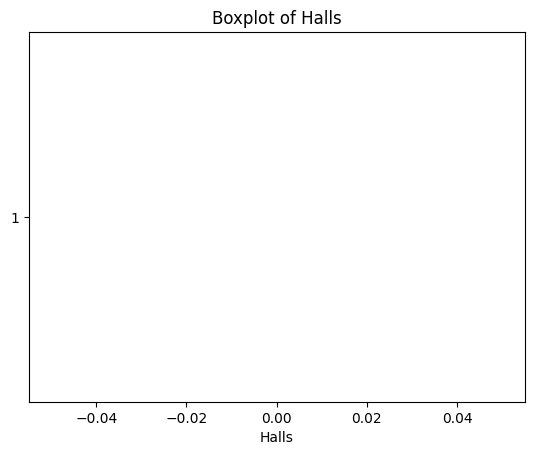

IQR: 0.0, Lower Bound: 1.0, Upper Bound: 1.0
Aykırı Değer Sayısı: 3729


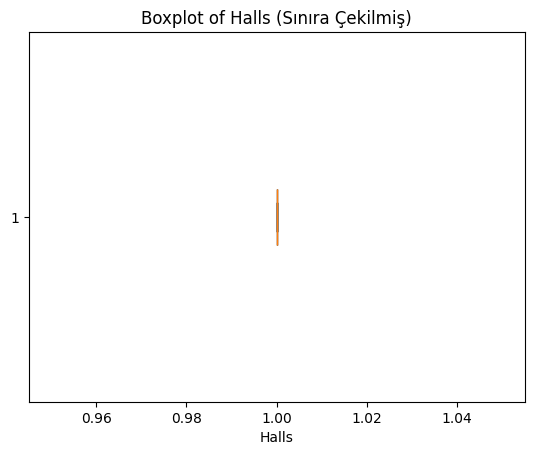


--- InsideSiteBinary Sütunu ---


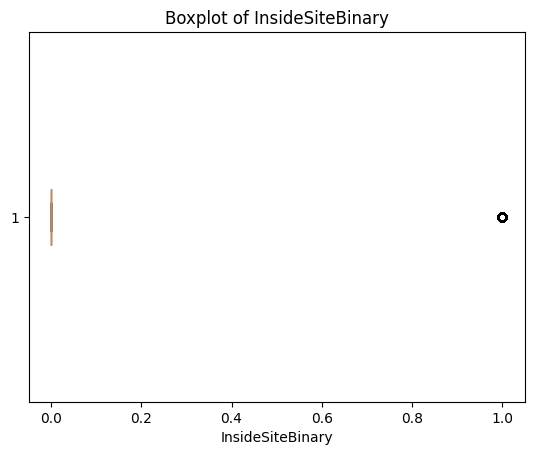

IQR: 0.0, Lower Bound: 0.0, Upper Bound: 0.0
Aykırı Değer Sayısı: 2227


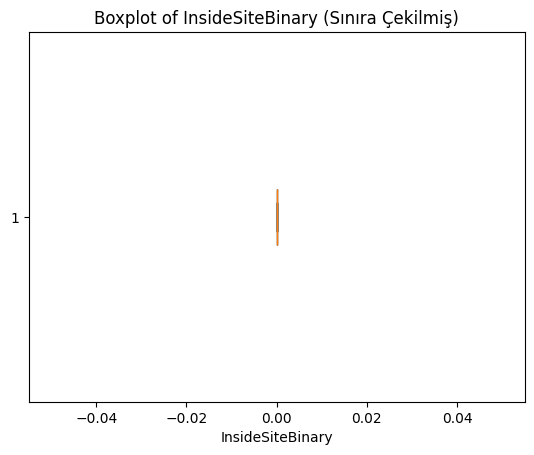


--- ItemStatus_encoded Sütunu ---


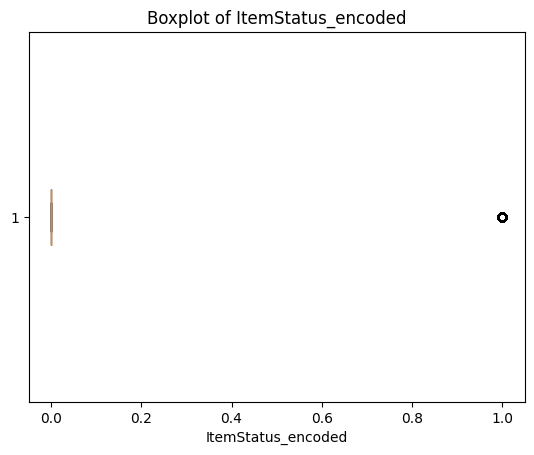

IQR: 0.0, Lower Bound: 0.0, Upper Bound: 0.0
Aykırı Değer Sayısı: 841


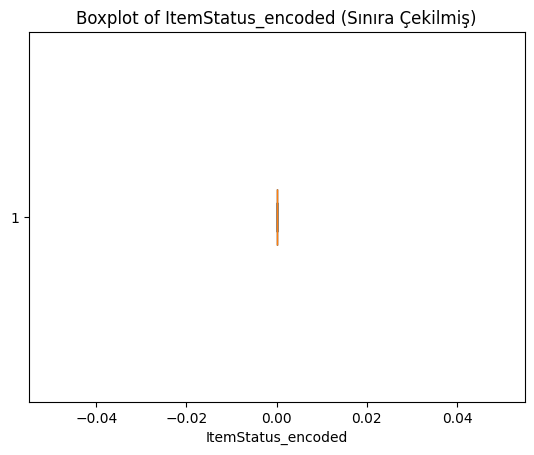


--- FloorCategory_encoded Sütunu ---


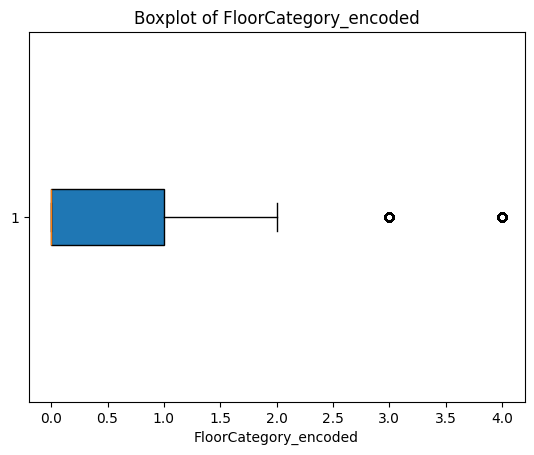

IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5
Aykırı Değer Sayısı: 3023


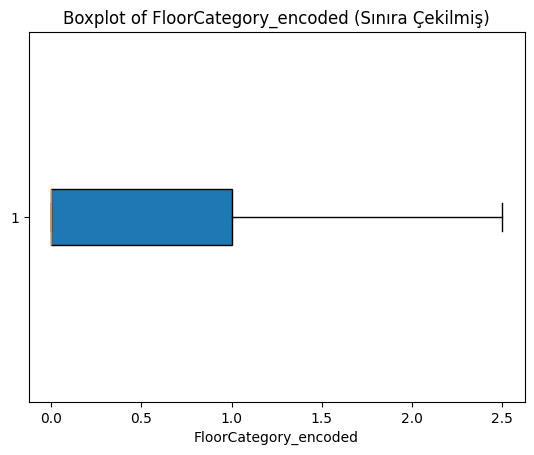

In [ ]:
df=pd.read_csv('/content/processed_data.csv')

import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    print(f"\n--- {col} Sütunu ---")

    # Boxplot ile aykırı değerleri görselleştir
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR yöntemi ile aykırı değer analizi
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Aykırı Değer Sayısı: {len(outliers)}")

    # Aykırı değerleri sınıra çek
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Sınıra çekilmiş veriyi tekrar görselleştir
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
    plt.xlabel(col)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Özellikler (X) ve hedef değişken (y) ayrımı
X = df.drop(['price'], axis=1)
y = df['price']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Regressor modelini oluştur ve eğit
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = dt_model.predict(X_test)

# Performans metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # squared=False yerine manuel hesaplama
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdır
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


MAE: 314154.70
MSE: 599265547491.25
RMSE: 774122.44
R2 Score: 0.8972


R^2ye göre model başarılı ancak, RMSE çok yüksek fiyatı çok uçta olan ilanlar ve aykırı değerler olabilir.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hedef ve özellikler
X = df.drop('price', axis=1)
y = df['price']

# Eğitim/test bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model ve hiperparametre aralığı
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Tahmin ve metrikler
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 En iyi hiperparametreler:", grid_search.best_params_)
print(f"📉 Yeni MSE: {mse:.2f}")
print(f"📉 Yeni RMSE: {rmse:.2f}")
print(f"📈 Yeni R² Score: {r2:.4f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
🔍 En iyi hiperparametreler: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}
📉 Yeni MSE: 440043467417.99
📉 Yeni RMSE: 663357.72
📈 Yeni R² Score: 0.9245


R^2 kare daha yüksek ve RMSE daha düşük model daha başarılı

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# 1. Veri setini ayır
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model
dt = DecisionTreeRegressor(random_state=42)

# 3. Hiperparametre alanları
param_dist = {
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 30),
    "min_samples_leaf": randint(1, 30)
}

# 4. RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# 5. En iyi model ile tahmin
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tahmin ve metrikler
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 En iyi hiperparametreler:", random_search.best_params_)
print(f"📉 Yeni MSE: {mse:.2f}")
print(f"📉 Yeni RMSE: {rmse:.2f}")
print(f"📈 Yeni R² Score: {r2:.4f}")


🔍 En iyi hiperparametreler: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 15}
📉 Yeni MSE: 452703306638.86
📉 Yeni RMSE: 672832.30
📈 Yeni R² Score: 0.9223


MSE, Ortalama kare hatayı temsil eder. Değeri ne kadar küçükse, model o kadar iyi demektir. Bu değer, modelin tahmin ettiği fiyatlarla gerçek fiyatlar arasında hâlâ milyonlar seviyesinde bir fark olabildiğini gösteriyor.

RMSE, Hatanın birim olarak fiyatla aynı hale getirilmiş hâlidir. Yani, modelin tahminlerinde ortalama yaklaşık 673 bin TL sapma var. Konut fiyatlarının milyonlar düzeyinde olduğu bir veri setinde bu değer orta düzeyde kabul edilebilir.

Sonuç Olarak;

GridSearchCV, en iyi sonucu verdi: En düşük MSE ve en yüksek R² değeri.

RandomizedSearchCV, GridSearch'e çok yakın performans sergiledi ancak biraz daha hızlıdır.

Base Model, diğerlerine göre daha düşük doğrulukta ve daha yüksek hata oranına sahip.